In [2]:
#Imports & chargement

In [3]:
import pandas as pd
import plotly.express as px
from pathlib import Path

csv_path = Path('../data/processed/prix_carburants_clean.csv')
df = pd.read_csv(csv_path, parse_dates=['date'])

print("Lignes:", len(df))
print("Carburants:", sorted(df['carburant'].unique().tolist()))
df.head()

Lignes: 33906
Carburants: ['E10', 'E85', 'GPLc', 'Gazole', 'SP95', 'SP98']


id                       date     cp  \
0  4bc8939686ec3a92c1284c618b06be4e888ee3b9  2007-09-21 20:34:54+02:00  67130   
1  129e8c402346cd0248949913cd322775f99e80be  2009-11-12 17:02:11+01:00   1430   
2  5aec0a50cdb38b4b2fdd909759b17594de838f0d  2012-03-13 19:42:37+01:00  73100   
3  220e55f7ea27e24528e35045c69ce065942acbbb  2013-12-19 18:13:21+01:00  99999   
4  3484ef7c0b4891540ce51a9ff58374150df04ce4  2014-01-09 15:00:00+01:00  99999   

     commune                     adresse carburant  prix   latitude  \
0  SCHIRMECK          89 Rue de l'Eglise       E85  0.80  48.476389   
1    CEIGNES  AIRE DE CEIGNES HAUT BUGEY       E85  1.50  46.118096   
2      Mouxy           aire de drumettaz      GPLc  0.96  45.683132   
3      Paris             rue victor hugo      GPLc  0.60  48.539430   
4      Paris             rue victor hugo    Gazole  1.53  48.539430   

   longitude  id_station        jour  departement  
0   7.216873    67130001  2007-09-21           67  
1   5.491106     1430003  2009-11-12            1  
2   5.943675    73100010  2012-03-13           73  
3   7.498120    99999001  2013-12-19           99  
4   7.498120    99999001  2014-01-09           99

In [4]:
#Vue d’ensemble (par carburant)

In [5]:
overview = (df.groupby('carburant')['prix']
              .agg(count='count', mean='mean', std='std', min='min', max='max')
              .sort_values('mean'))
overview.round(3)

count   mean    std    min    max
carburant                                   
E85         3862  0.736  0.078  0.609  1.500
GPLc        1436  0.983  0.082  0.600  1.689
Gazole      9654  1.635  0.075  1.484  2.200
E10         7559  1.705  0.073  1.292  2.159
SP95        3281  1.747  0.065  1.579  2.470
SP98        8114  1.798  0.084  1.569  2.510

In [6]:
#Bar chart prix moyen par carburant

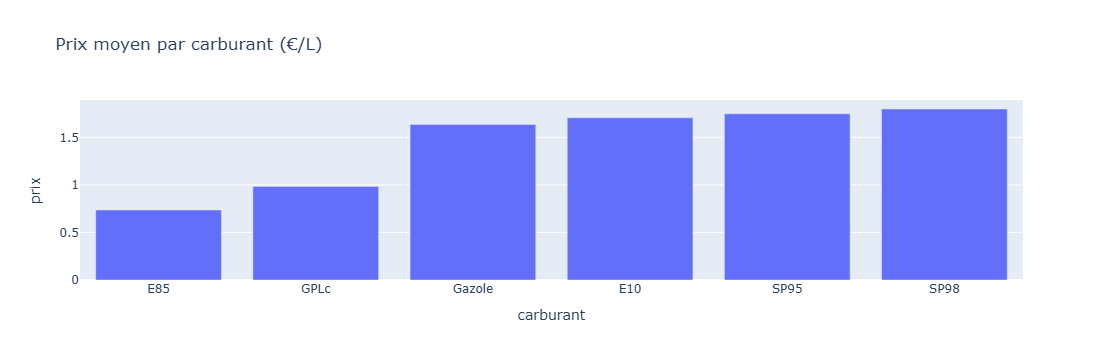

In [7]:
moy = (df.groupby('carburant', as_index=False)['prix']
         .mean()
         .sort_values('prix'))
fig = px.bar(moy, x='carburant', y='prix', title='Prix moyen par carburant (€/L)')
fig.show()

In [8]:
#Paramètre “carburant” à étudier

In [9]:
# Choisis un carburant ici (ex: "Gazole", "SP95", "SP98", "E10", "E85", "GPLc")
carb = "SP95"
dfc = df[df['carburant'] == carb].copy()
print(carb, ":", len(dfc), "lignes")
dfc.head()

SP95 : 3281 lignes


id                       date  \
9   95fc4f463818b007a09774aa79d799343e0a43fb  2021-09-06 12:08:15+02:00   
10  8b8c8feefda5906e4d1291e296d42e6ceeff4d5b  2022-10-21 16:13:35+02:00   
12  15bd206f138ba625d977c140716bd4e01f34a11a  2022-11-10 16:36:19+01:00   
15  bc0848c84bbc405042233f8be0945089ce2569d3  2023-05-16 18:16:07+02:00   
18  61252ff718ad1997bb9447cd78662a3b244a963a  2023-08-16 19:13:08+02:00   

       cp       commune                       adresse carburant   prix  \
9   52300     JOINVILLE            Avenue de la Marne      SP95  1.579   
10  80140   Le Translay                AUTOROUTE A 28      SP95  2.199   
12  72120  Saint-Calais           2 AVENUE DE VENDOME      SP95  1.920   
15  43800         Vorey    25 AVENUE PIERRE CHABANNES      SP95  1.989   
18  15800  VIC SUR CERE  12 AVENUE MAX MABIT FOURNIER      SP95  1.990   

     latitude  longitude  id_station        jour  departement  
9   48.450000   5.146000    52300003  2021-09-06           52  
10  49.962000   1.665000    80140006  2022-10-21           80  
12  47.917000   0.752000    72120006  2022-11-10           72  
15  45.184000   3.911000    43800001  2023-05-16           43  
18  44.977675   2.623313    15800005  2023-08-16           15

In [10]:
#Top 15 stations les moins chères (carburant choisi)

In [11]:
top15 = (dfc.sort_values('prix')
           .loc[:, ['commune','cp','adresse','prix','date']]
           .head(15))
top15

commune     cp                     adresse   prix  \
9                  JOINVILLE  52300          Avenue de la Marne  1.579   
14504      TOURNON-SUR-RHôNE   7300       RUE HELENE DE TOURNON  1.625   
24449                  CUERS  83390       91 rue de la merlette  1.635   
3110                  Seclin  59113           15 Route de Lille  1.635   
4689                  VANNES  56000        BOULEVARD DE LA PAIX  1.636   
28726              Hennebont  56700               LA GARDELOUPE  1.637   
3654                 QUIMPER  29000       BLD FLANDRE DUNKERQUE  1.641   
14098              Kervignac  56700     Le Champ de la Patience  1.643   
8698   CASTILLON-LA-BATAILLE  33350             RUE JULES FERRY  1.648   
26435                  TULLE  19000     14 RUE DU DOCTEUR RAMON  1.648   
5319               BOURBOURG  59630  CHEMIN DE LA VIEILLE COLME  1.649   
3051        Salins-les-Bains  39110   13 AVENUE ARISTIDE BRIAND  1.649   
5253                  SANTES  59211       2 rue du coeur joyeux  1.649   
1119                  EVREUX  27000            BD. DE NORMANDIE  1.649   
29760                 CHAGNY  71150               Rue de Wissen  1.649   

                            date  
9      2021-09-06 12:08:15+02:00  
14504  2025-09-10 14:34:18+02:00  
24449  2025-09-12 09:22:45+02:00  
3110   2025-08-19 11:14:17+02:00  
4689   2025-09-01 17:42:47+02:00  
28726  2025-09-12 11:37:00+02:00  
3654   2025-08-25 11:31:12+02:00  
14098  2025-09-10 12:29:37+02:00  
8698   2025-09-08 10:01:00+02:00  
26435  2025-09-12 10:45:18+02:00  
5319   2025-09-03 14:42:49+02:00  
3051   2025-08-18 19:11:14+02:00  
5253   2025-09-03 13:29:09+02:00  
1119   2025-07-15 13:55:38+02:00  
29760  2025-09-12 12:40:04+02:00

In [12]:
#Carte (carburant choisi)

In [13]:
sample = dfc.dropna(subset=['latitude','longitude']).sample(
    min(2000, len(dfc)), random_state=42
)
fig = px.scatter_mapbox(sample, lat='latitude', lon='longitude', color='prix',
                        hover_name='commune', hover_data=['adresse','cp','prix'],
                        zoom=4, height=650)
fig.update_layout(mapbox_style='open-street-map',
                  title=f'{carb} – stations échantillon (couleur = prix)')
fig.show()

In [14]:
#Synthèse par département (carburant choisi)

In [15]:
by_dept = (dfc.groupby('departement', as_index=False)['prix']
             .mean()
             .dropna()
             .sort_values('prix'))
by_dept.head(15)

departement      prix
28           29  1.693493
58           59  1.710833
27           28  1.711238
59           60  1.712395
34           35  1.712706
21           22  1.713571
43           44  1.714200
89           90  1.716000
69           70  1.719182
52           53  1.719778
75           76  1.721062
61           62  1.721224
32           33  1.721342
26           27  1.722852
13           14  1.724000

In [16]:
#Bar chart départements (TOP/BOTTOM)

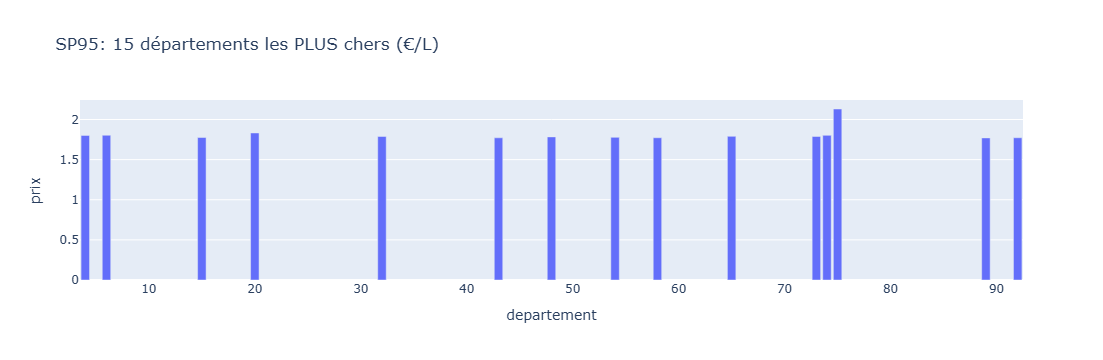

In [17]:
n = 15
top_cheapest = by_dept.head(n)
top_expensive = by_dept.tail(n)

fig1 = px.bar(top_cheapest, x='departement', y='prix',
              title=f'{carb}: {n} départements les MOINS chers (€/L)')
fig2 = px.bar(top_expensive, x='departement', y='prix',
              title=f'{carb}: {n} départements les PLUS chers (€/L)')
fig1.show()
fig2.show()

In [18]:
#Exports “prêts README”

In [19]:
from pathlib import Path
Path('../reports').mkdir(exist_ok=True)

overview.round(3).to_csv('../reports/overview_par_carburant.csv', index=True, encoding='utf-8')
top15.to_csv(f'../reports/top15_{carb}.csv', index=False, encoding='utf-8')
by_dept.round(3).to_csv(f'../reports/par_departement_{carb}.csv', index=False, encoding='utf-8')

print("Écrits dans /reports :", list(Path('../reports').glob('*.csv')))

Écrits dans /reports : [WindowsPath('../reports/overview_par_carburant.csv'), WindowsPath('../reports/par_departement_SP95.csv'), WindowsPath('../reports/top15_SP95.csv')]


In [20]:
#Boxplot par carburant (jour courant)

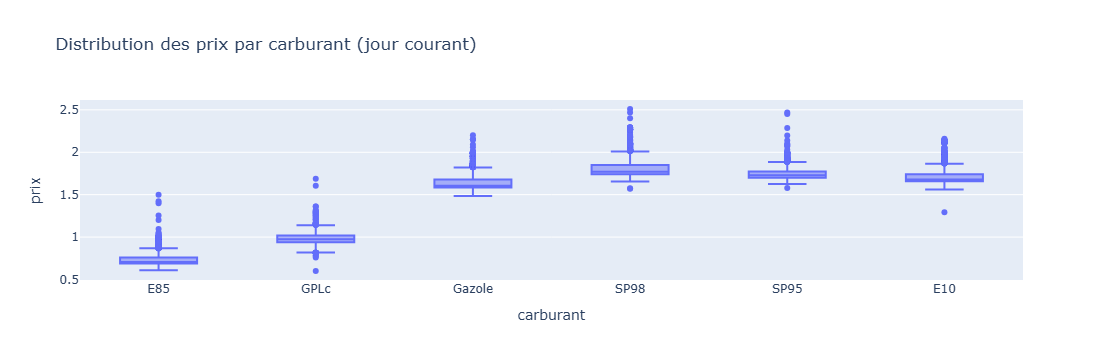

In [21]:
import plotly.express as px
df_day = pd.read_csv('../data/processed/prix_carburants_clean.csv', parse_dates=['date'])

fig = px.box(df_day, x='carburant', y='prix', points='outliers',
             title="Distribution des prix par carburant (jour courant)")
fig.show()

In [22]:
#Courbe d’évolution (multi-jours)

In [23]:
import pandas as pd, plotly.express as px

hist = pd.read_csv('../data/processed/history/prix_carburants_history.csv', parse_dates=['date'])
# moyenne quotidienne par carburant
daily = (hist.groupby(['jour','carburant'], as_index=False)['prix'].mean()
               .sort_values(['carburant','jour']))

fig = px.line(daily, x='jour', y='prix', color='carburant',
              title='Évolution du prix moyen par carburant (€/L)')
fig.update_traces(mode='lines+markers')
fig.show()

# Focus sur un carburant + MA7 (quand tu auras plus de jours)
carb = "SP95"
d = daily[daily['carburant']==carb].copy().sort_values('jour')
d['MA7'] = d['prix'].rolling(7, min_periods=1).mean()
fig2 = px.line(d, x='jour', y=['prix','MA7'], title=f'{carb} – prix & moyenne mobile 7j')
fig2.show()